In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy
import prince
import pickle
import plotly.express as px

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 불러오기

In [3]:
with open('df_FwithS_mat.pickle', 'rb') as f:
    FwithS_mat = pickle.load(f)

In [4]:
with open('df_FwoutS_mat.pickle', 'rb') as f:
    FwoutS_mat = pickle.load(f)

In [5]:
with open('df_fi.pickle', 'rb') as f:
    df_fi = pickle.load(f)

In [6]:
with open('df_fi_30.pickle', 'rb') as f:
    df_fi_30 = pickle.load(f)

# 과거질병 top 30 heatmap

In [7]:
feature_eng = [
    'Acute kidney failure', 'Chronic diastolic heart failure',
    'Acute on chronic diastolic heart failure',
    'Chronic systolic heart failure', 'Aortocoronary bypass status',
    'Urinary tract infection', 'Acute systolic heart failure',
    'Chronic kidney disease', 'Systolic heart failure',
    'Subendocardial infarction', 'Acute on chronic systolic heart failure',
    'Other pulmonary insufficiency', 'Pneumonia', 'Severe sepsis',
    'Acute respiratory failure', 'Acute diastolic heart failure',
    'Diastolic heart failure', 'Pleural effusion', 'Mitral valve disorders',
    'Other primary cardiomyopathies', 'Corticoadrenal insufficiency',
    'Atherosclerosis',
    'Hypertensive chronic kidney disease',
    'Cardiogenic shock',
    'Hypertensive chronic kidney disease',
    'Thrombocytopenia', 'Other chronic pulmonary heart diseases', 'Anemia',
    'Tricuspid valve disease', 'Food/vomit pneumonitis'
]

In [8]:
df_fi = df_fi.T[[i for i in df_fi_30.index.values]]
df_fi.columns = feature_eng
df_fi = df_fi.T
df_fi

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Acute kidney failure,0.054865,0.072253,0.055870,0.058289,0.048258,0.062488,0.082383,0.039310,0.100400,0.061463,...,0.033646,0.052148,0.068100,0.031506,0.057280,0.062363,0.061179,0.041708,0.053127,0.034365
Chronic diastolic heart failure,0.025988,0.024193,0.031359,0.030809,0.027917,0.029467,0.025513,0.029999,0.022053,0.030259,...,0.025077,0.023864,0.030256,0.032194,0.026343,0.028257,0.030204,0.027268,0.032787,0.031383
Acute on chronic diastolic heart failure,0.029440,0.026976,0.028205,0.030176,0.024552,0.034504,0.024596,0.030750,0.024136,0.029610,...,0.029835,0.029841,0.028610,0.030098,0.024039,0.027343,0.028933,0.025010,0.027227,0.029079
Chronic systolic heart failure,0.028150,0.024878,0.027961,0.026625,0.024895,0.032348,0.028202,0.030603,0.025650,0.030070,...,0.030172,0.026734,0.028174,0.025855,0.022321,0.028102,0.031362,0.027690,0.028350,0.027553
Aortocoronary bypass status,0.027029,0.027736,0.024811,0.021653,0.021999,0.026497,0.021558,0.035475,0.026244,0.024372,...,0.021373,0.027497,0.025360,0.025563,0.020497,0.032762,0.020277,0.023704,0.035351,0.022819
Urinary tract infection,0.012824,0.016574,0.019040,0.038003,0.036779,0.016909,0.023521,0.029983,0.020017,0.009387,...,0.017439,0.019951,0.014780,0.014476,0.013888,0.011673,0.011705,0.023906,0.019468,0.017142
Acute systolic heart failure,0.019875,0.018639,0.024302,0.022327,0.019937,0.017589,0.022830,0.019523,0.021006,0.021369,...,0.015390,0.018187,0.017201,0.020581,0.017153,0.019877,0.015169,0.020059,0.024009,0.017037
Chronic kidney disease,0.018804,0.022467,0.011152,0.014996,0.013064,0.009720,0.010066,0.038604,0.013068,0.000668,...,0.011050,0.018017,0.001496,0.017265,0.032400,0.011700,0.016393,0.023569,0.005944,0.021560
Systolic heart failure,0.017257,0.018116,0.016911,0.018511,0.017401,0.016596,0.016059,0.015915,0.013995,0.021990,...,0.014576,0.018383,0.017869,0.019659,0.012379,0.018351,0.018355,0.016326,0.018865,0.018908
Subendocardial infarction,0.012953,0.022376,0.019394,0.011314,0.012299,0.017527,0.013340,0.012999,0.027000,0.017668,...,0.022703,0.016180,0.015524,0.012969,0.009235,0.009995,0.014579,0.008942,0.026502,0.014486


<Figure size 720x576 with 0 Axes>

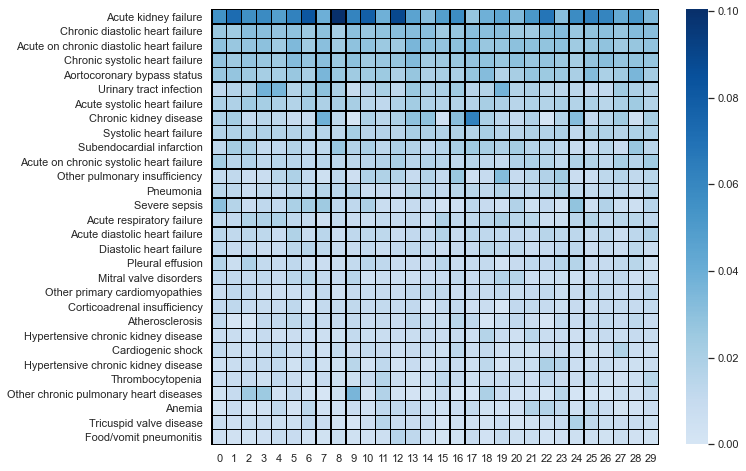

In [47]:
plt.figure(figsize=(10, 8))

ax = sns.heatmap(df_fi,
                 cmap='Blues',
                 center=0.04,
                 linewidths=0.3,
                 linecolor='black',
                 clip_on=False)

sns.set(font_scale=3)

## 과거질병 top 30 barplot

In [9]:
df_fi_30['feature'] = feature_eng

<Figure size 1440x1440 with 0 Axes>

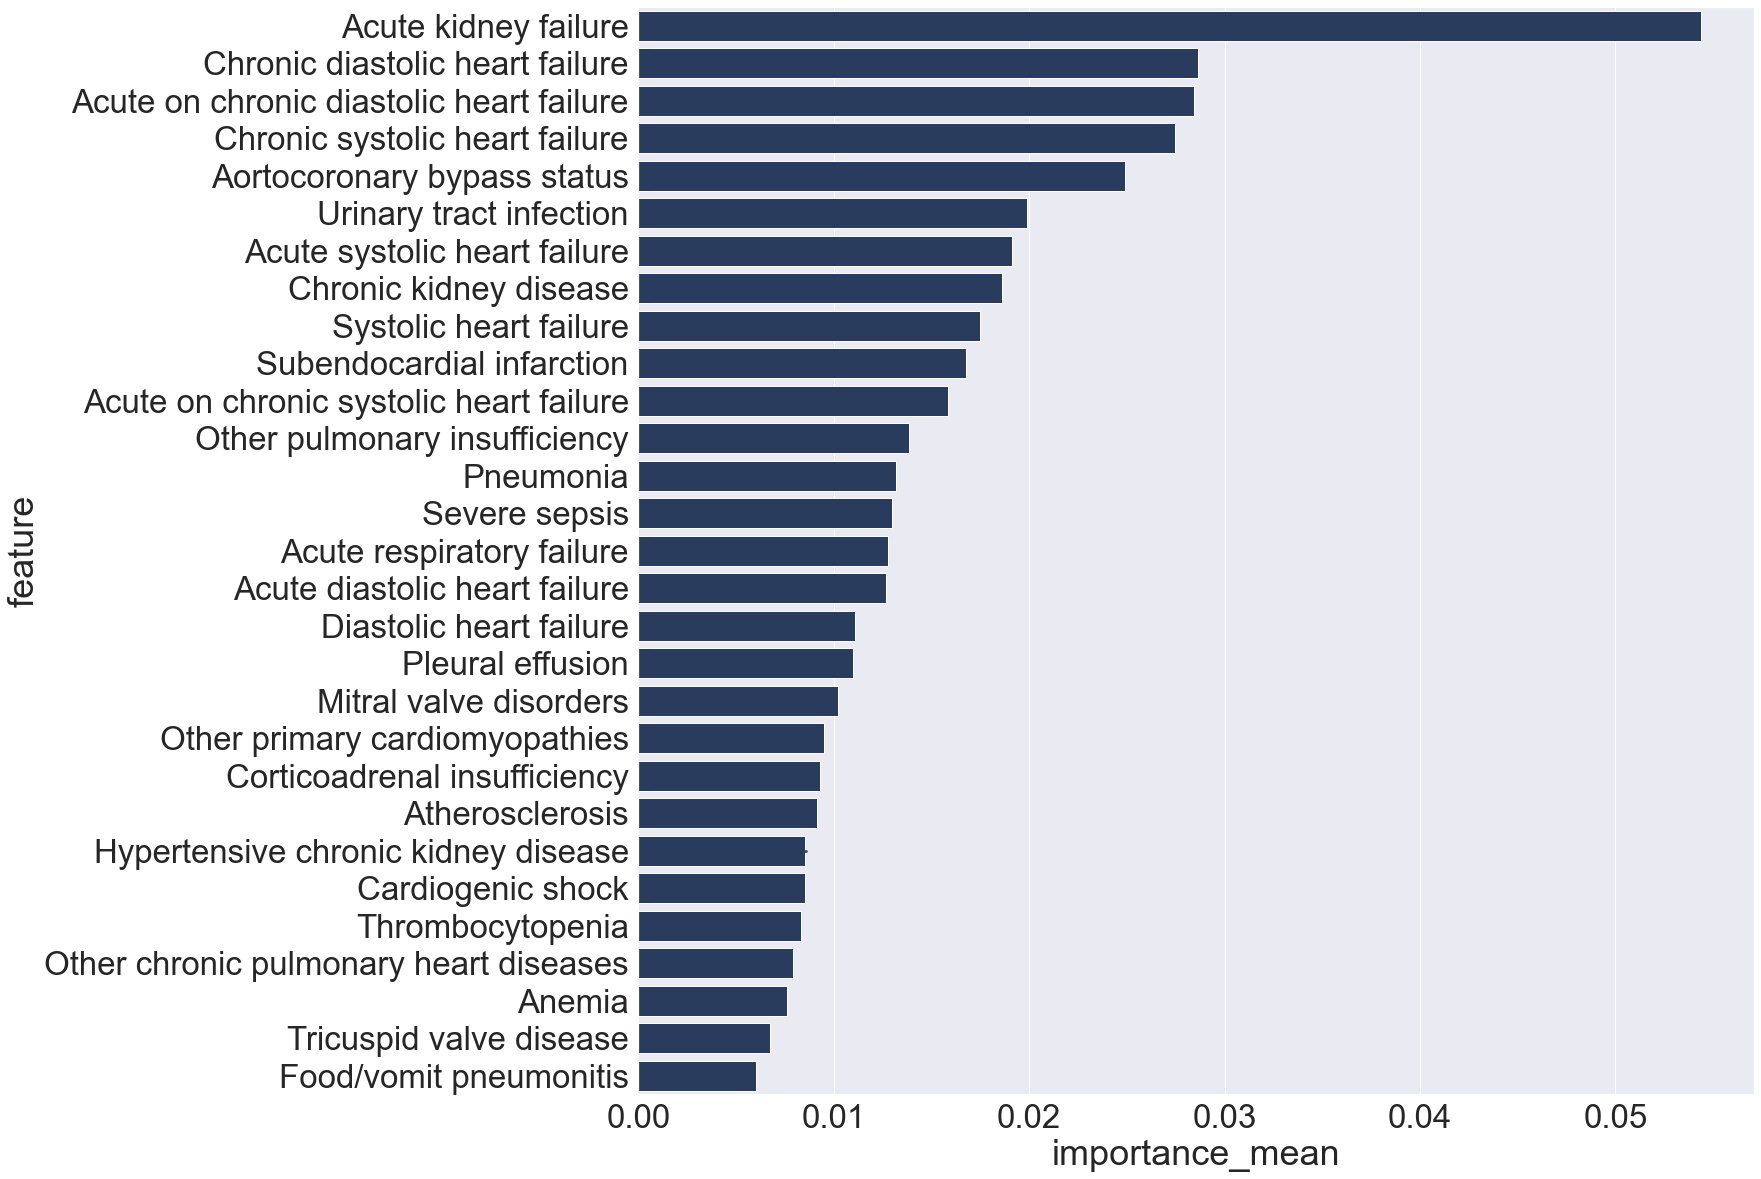

In [14]:
plt.figure(figsize=(20, 20))

ax = sns.barplot(x='importance_mean',
                 y='feature',
                 data=df_fi_30,
                 orient='h',
                 color='#203966')

sns.set(font_scale=3)

## 과거질병 top barplot

In [16]:
lst_9 = [
    'icd9 : 5849', 'icd9 : 5990', 'icd9 : 41071', 'icd9 : 486', 'icd9 : 51881',
    'icd9 : 2554', 'icd9 : 44022', 'icd9 : 2859'
]

In [17]:
feature_kor = [
    '급성 신부전', '요로감염', '심내막하경색', '폐렴', 
    '급성호흡부전', '피질 부신 기능 부전', '동맥경화', '빈혈'
]

In [18]:
fi_top = df_fi_30.copy()

for i in fi_top.index:
    if i not in lst_9:
        fi_top = fi_top.drop(i)
        
fi_top['feature'] = feature_kor

In [19]:
plt.rcParams['font.family'] = 'NanumGothic'

(0.0, 0.06)

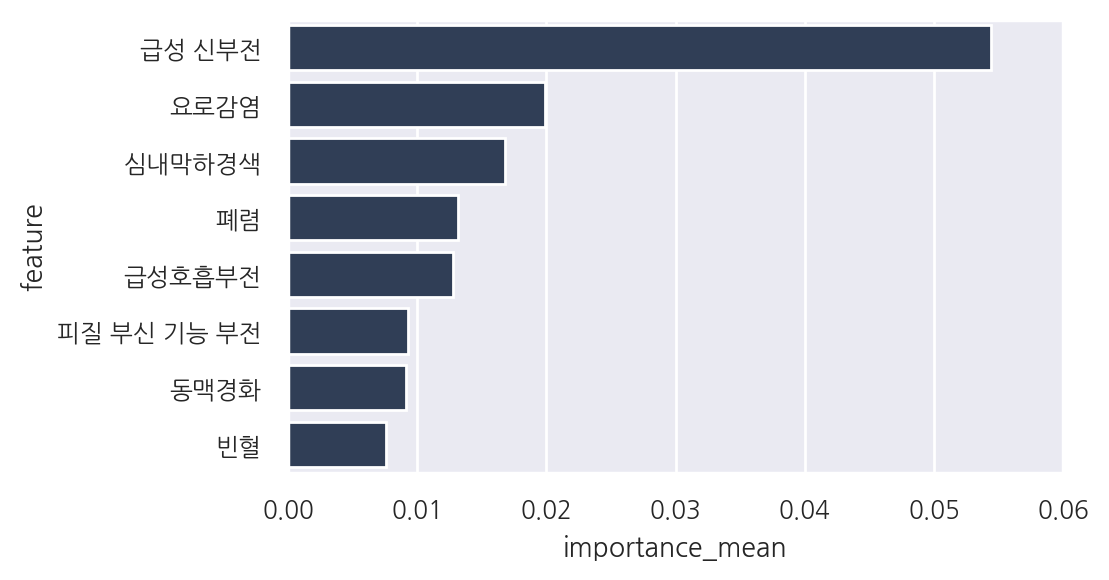

In [71]:
fig = plt.figure(figsize = (5,3), dpi = 200)

fig = sns.barplot(data = fi_top, x = 'importance_mean', y = 'feature', color = '#293C5D')
fig = sns.set(font_scale = 0.8)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 23
plt.xlim(0, 0.06)

(0.0, 0.06)

Text(0.05538954383134842, 0.0, '0.0544')

Text(0.0208857169598341, 1.0, '0.0199')

Text(0.01777754707634449, 2.0, '0.0168')

Text(0.014171167112886907, 3.0, '0.0132')

Text(0.01376747975498438, 4.0, '0.0128')

Text(0.010305110201239587, 5.0, '0.0093')

Text(0.010136713109910489, 6.0, '0.0091')

Text(0.008588847540318967, 7.0, '0.0076')

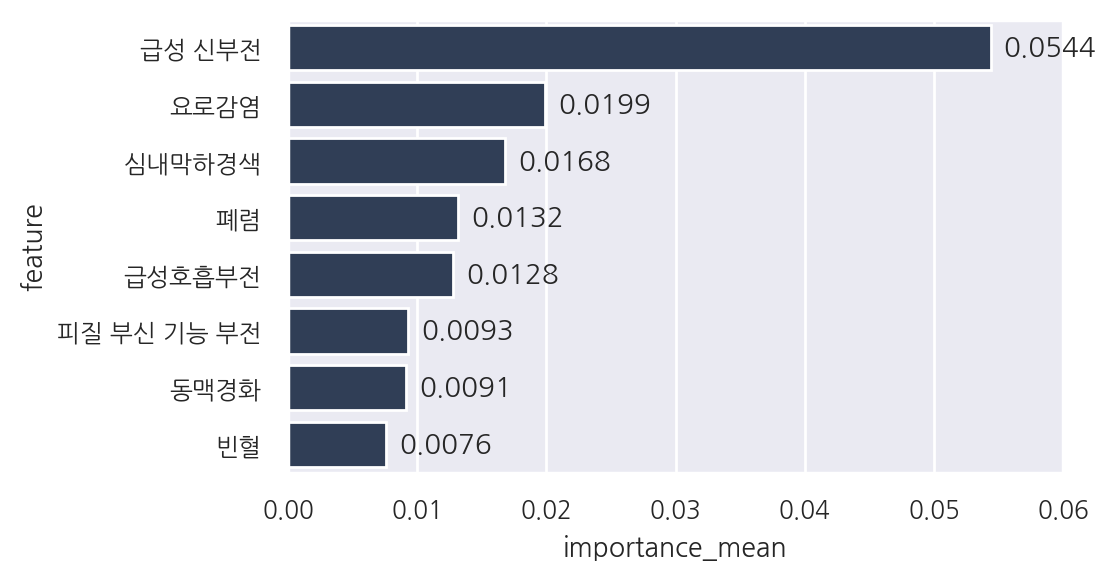

In [22]:
fig = plt.figure(figsize=(5,3), dpi=200)

ax = sns.barplot(data=fi_top, x='importance_mean', y='feature', color='#293C5D')
sns.set(font_scale=0.8)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 23
plt.xlim(0, 0.06)

# 막대 위에 값 출력하기
for i, p in enumerate(ax.patches):
    ax.annotate('{:.4f}'.format(p.get_width()), 
                xy=(p.get_width()+0.001, p.get_y()+p.get_height()/2), 
                ha='left', va='center', fontsize=10)
plt.show()

## 과거 질병 마커 심부전증 환자수 bar graph

In [74]:
FwithS_mat.replace({1: 'O', 0: 'X'}, inplace=True)
FwoutS_mat.replace({1: 'O', 0: 'X'}, inplace=True)

### 급성 신부전

In [75]:
df_with_5849 = pd.DataFrame(FwithS_mat['icd9 : 5849'])
df_with_5849['심부전'] = 'O'
df_out_5849 = pd.DataFrame(FwoutS_mat['icd9 : 5849'])
df_out_5849['심부전'] = 'X'
df_out_5849 = df_out_5849.reset_index()
df_out_5849 = df_out_5849.drop('index', axis=1)

In [76]:
df_5849 = pd.concat([df_with_5849, df_out_5849])
df_5849 = df_5849.rename(columns={'icd9 : 5849': '급성 신부전'})

<AxesSubplot:xlabel='심부전', ylabel='count'>

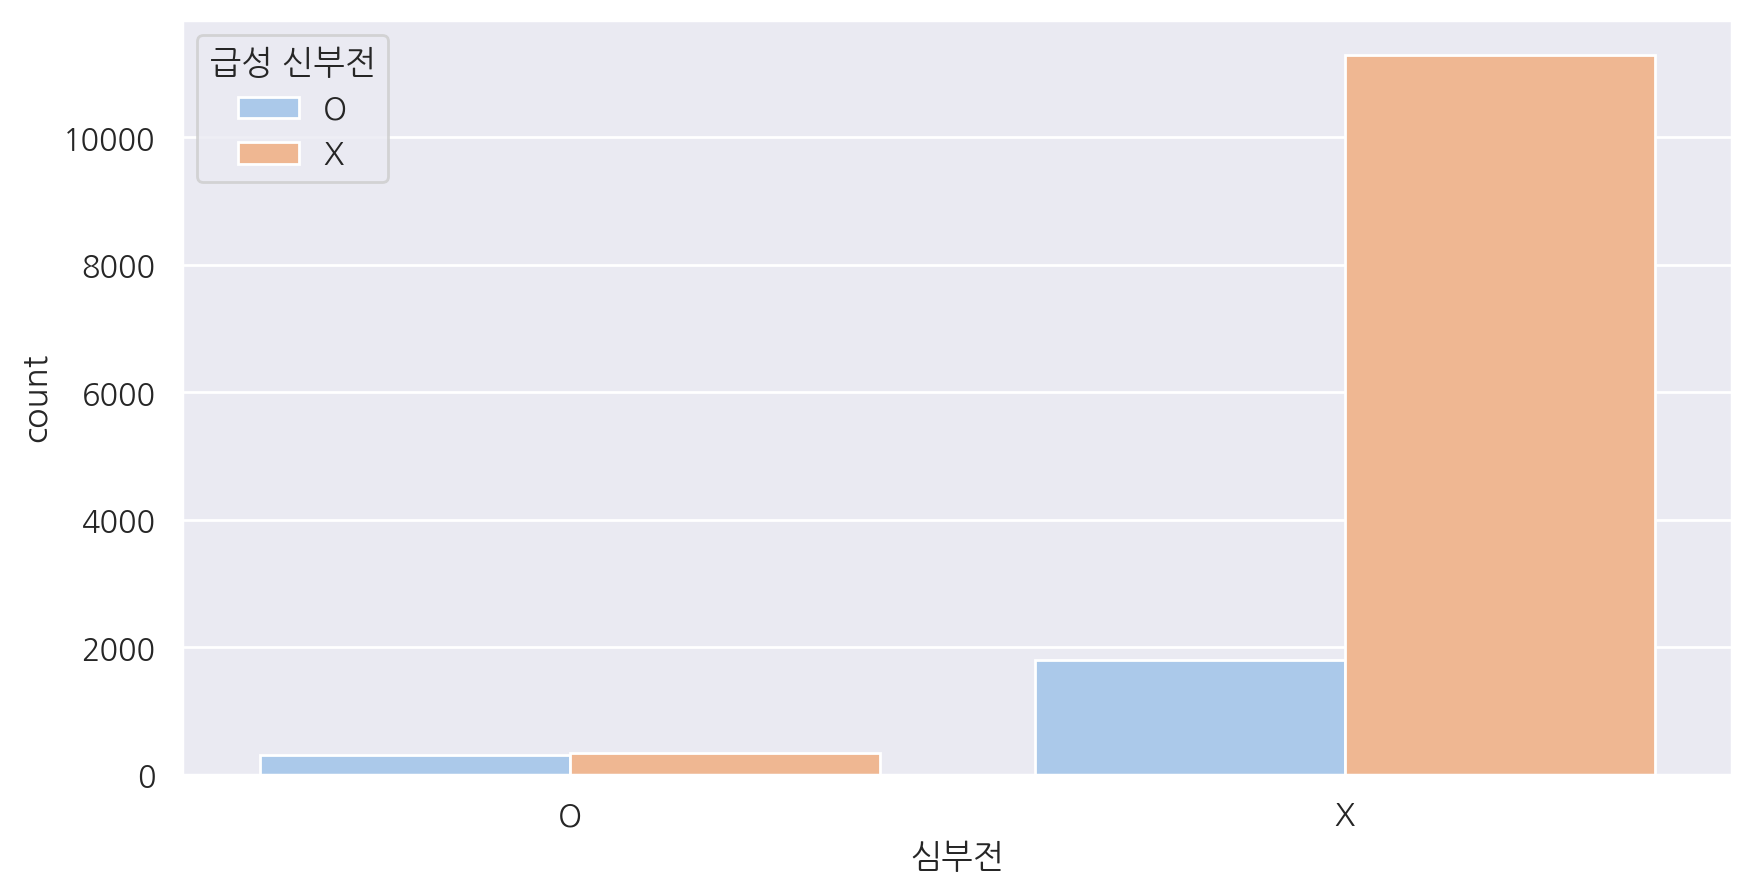

In [90]:
fig = plt.figure(figsize=(10, 5), dpi=200)

sns.countplot(data=df_5849, x='심부전', hue='급성 신부전')
sns.set_palette("pastel")

### 심내막하경색

<AxesSubplot:xlabel='심부전', ylabel='count'>

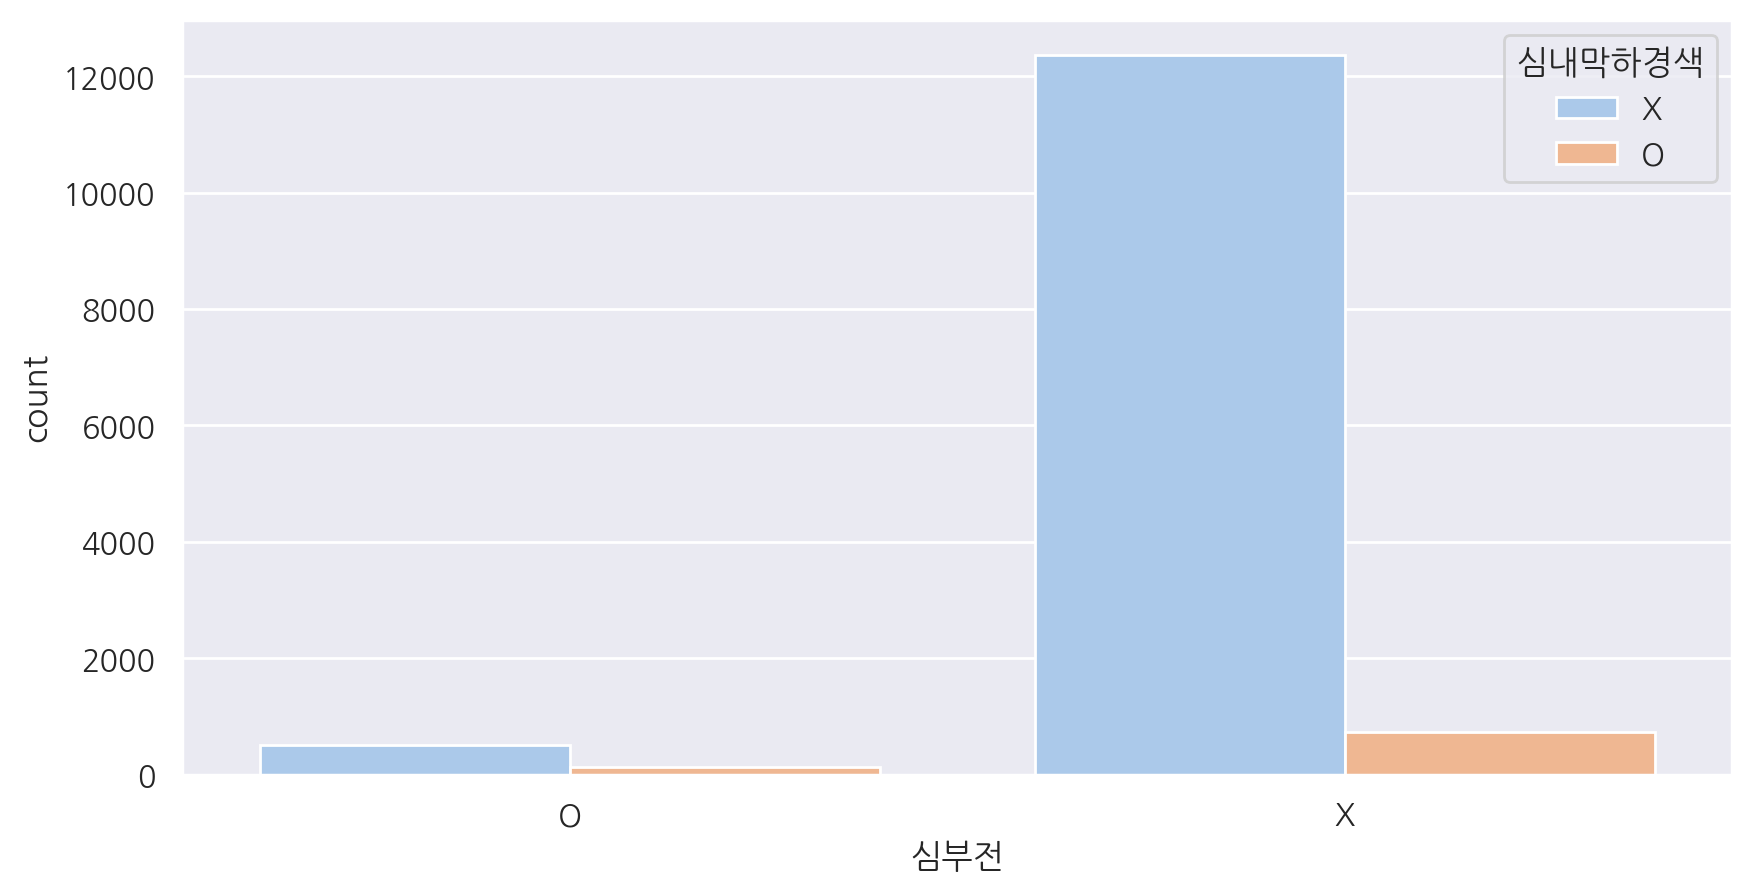

In [91]:
df_with_5849 = pd.DataFrame(FwithS_mat['icd9 : 41071'])
df_with_5849['심부전'] = 'O'
df_out_5849 = pd.DataFrame(FwoutS_mat['icd9 : 41071'])
df_out_5849['심부전'] = 'X'
df_out_5849 = df_out_5849.reset_index()
df_out_5849 = df_out_5849.drop('index', axis=1)

df_5849 = pd.concat([df_with_5849, df_out_5849])
df_5849 = df_5849.rename(columns={'icd9 : 41071': '심내막하경색'})

fig = plt.figure(figsize=(10, 5), dpi=200)

sns.countplot(data=df_5849, x='심부전', hue='심내막하경색')
sns.set_palette("pastel")

### 폐렴

<AxesSubplot:xlabel='심부전', ylabel='count'>

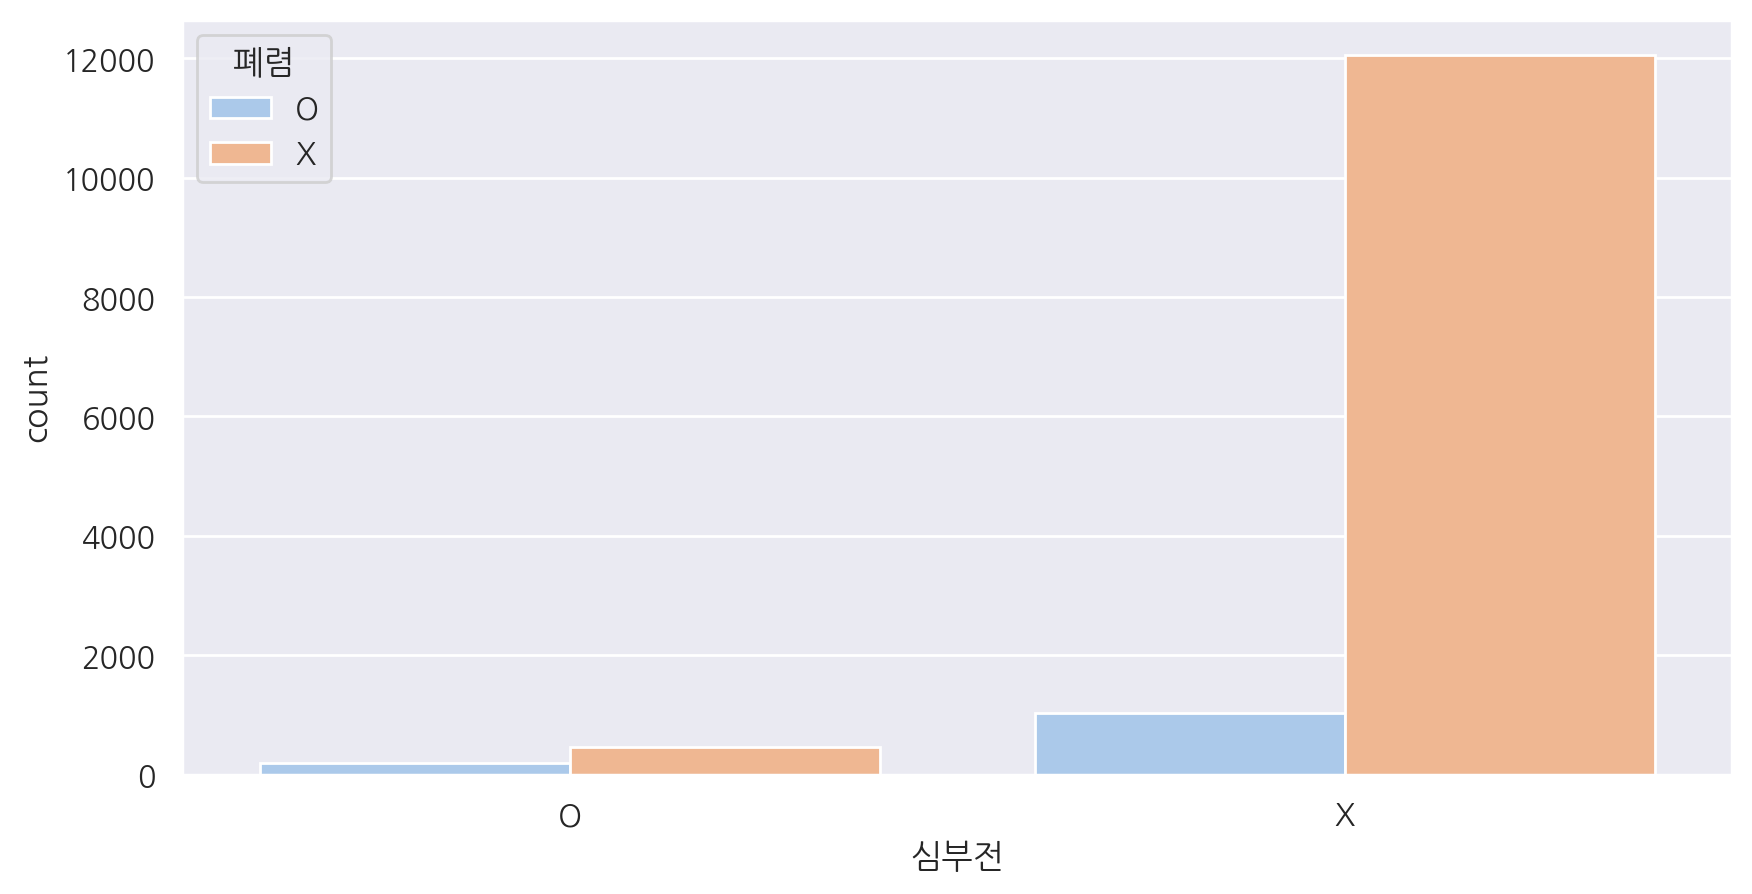

In [92]:
df_with_5849 = pd.DataFrame(FwithS_mat['icd9 : 486'])
df_with_5849['심부전'] = 'O'
df_out_5849 = pd.DataFrame(FwoutS_mat['icd9 : 486'])
df_out_5849['심부전'] = 'X'
df_out_5849 = df_out_5849.reset_index()
df_out_5849 = df_out_5849.drop('index', axis=1)

df_5849 = pd.concat([df_with_5849, df_out_5849])
df_5849 = df_5849.rename(columns={'icd9 : 486': '폐렴'})

fig = plt.figure(figsize=(10, 5), dpi=200)

sns.countplot(data=df_5849, x='심부전', hue='폐렴')
sns.set_palette("pastel")

### 요로감염

<AxesSubplot:xlabel='심부전', ylabel='count'>

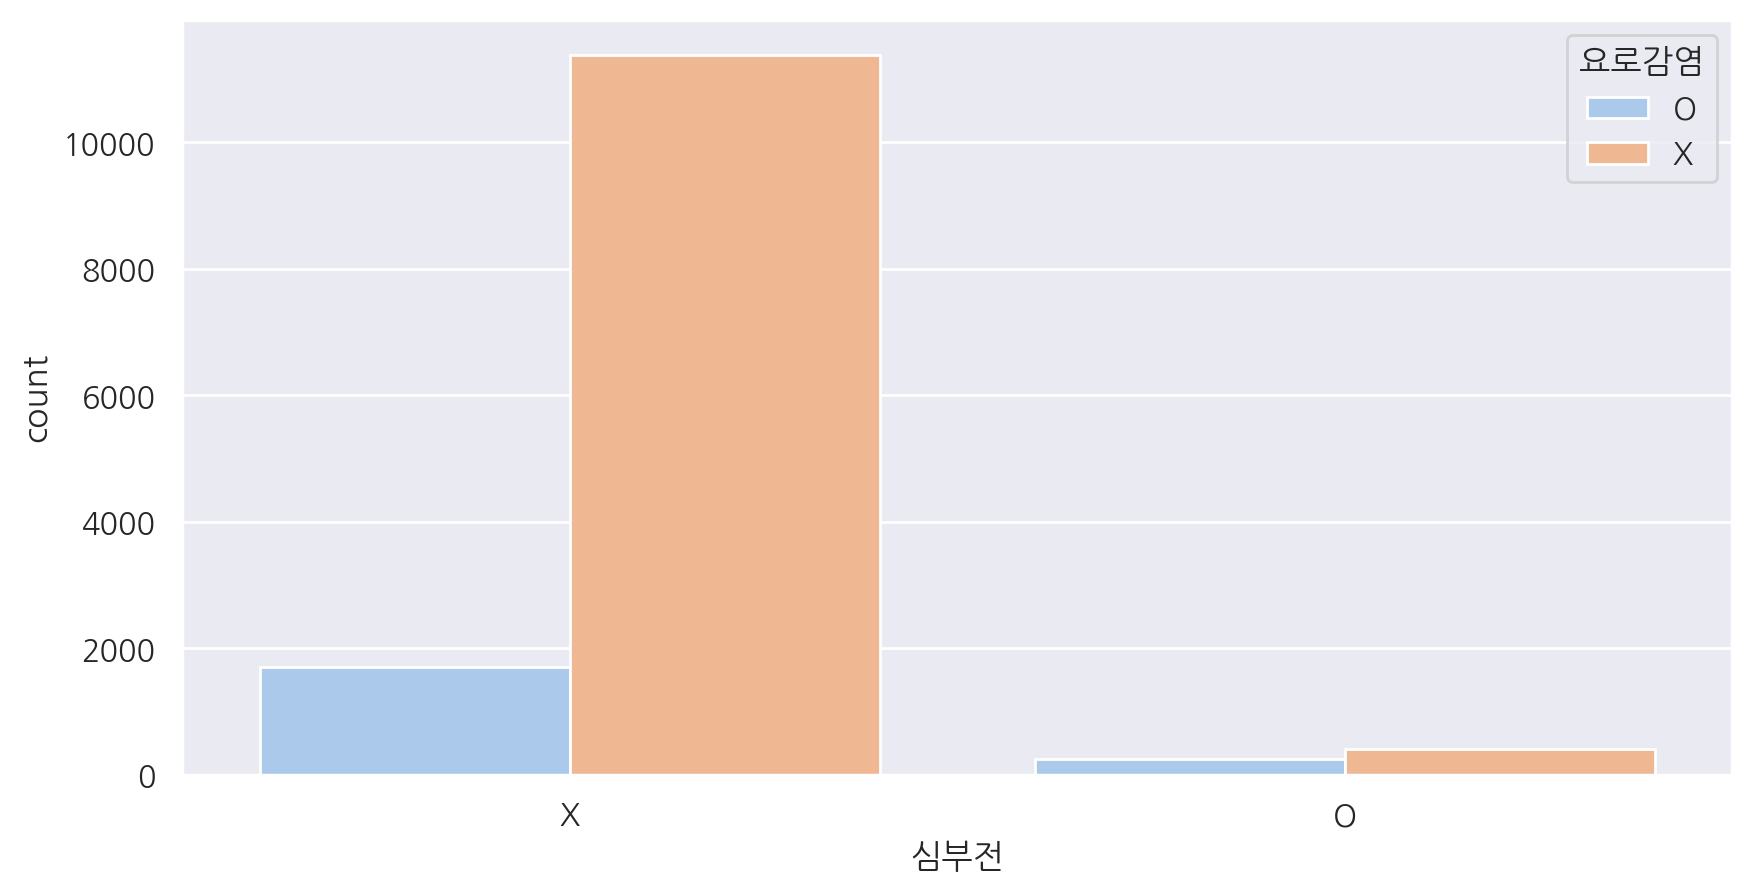

In [93]:
df_with_5849 = pd.DataFrame(FwithS_mat['icd9 : 5990'])
df_with_5849['심부전'] = 'O'
df_out_5849 = pd.DataFrame(FwoutS_mat['icd9 : 5990'])
df_out_5849['심부전'] = 'X'
df_out_5849 = df_out_5849.reset_index()
df_out_5849 = df_out_5849.drop('index', axis=1)

df_5849 = pd.concat([df_with_5849, df_out_5849])
df_5849 = df_5849.rename(columns={'icd9 : 5990': '요로감염'})
df_5849 = df_5849.sort_values(by='요로감염')

fig = plt.figure(figsize=(10, 5), dpi=200)

sns.countplot(data=df_5849, x='심부전', hue='요로감염')
sns.set_palette("pastel")

### 급성호흡부전

<AxesSubplot:xlabel='심부전', ylabel='count'>

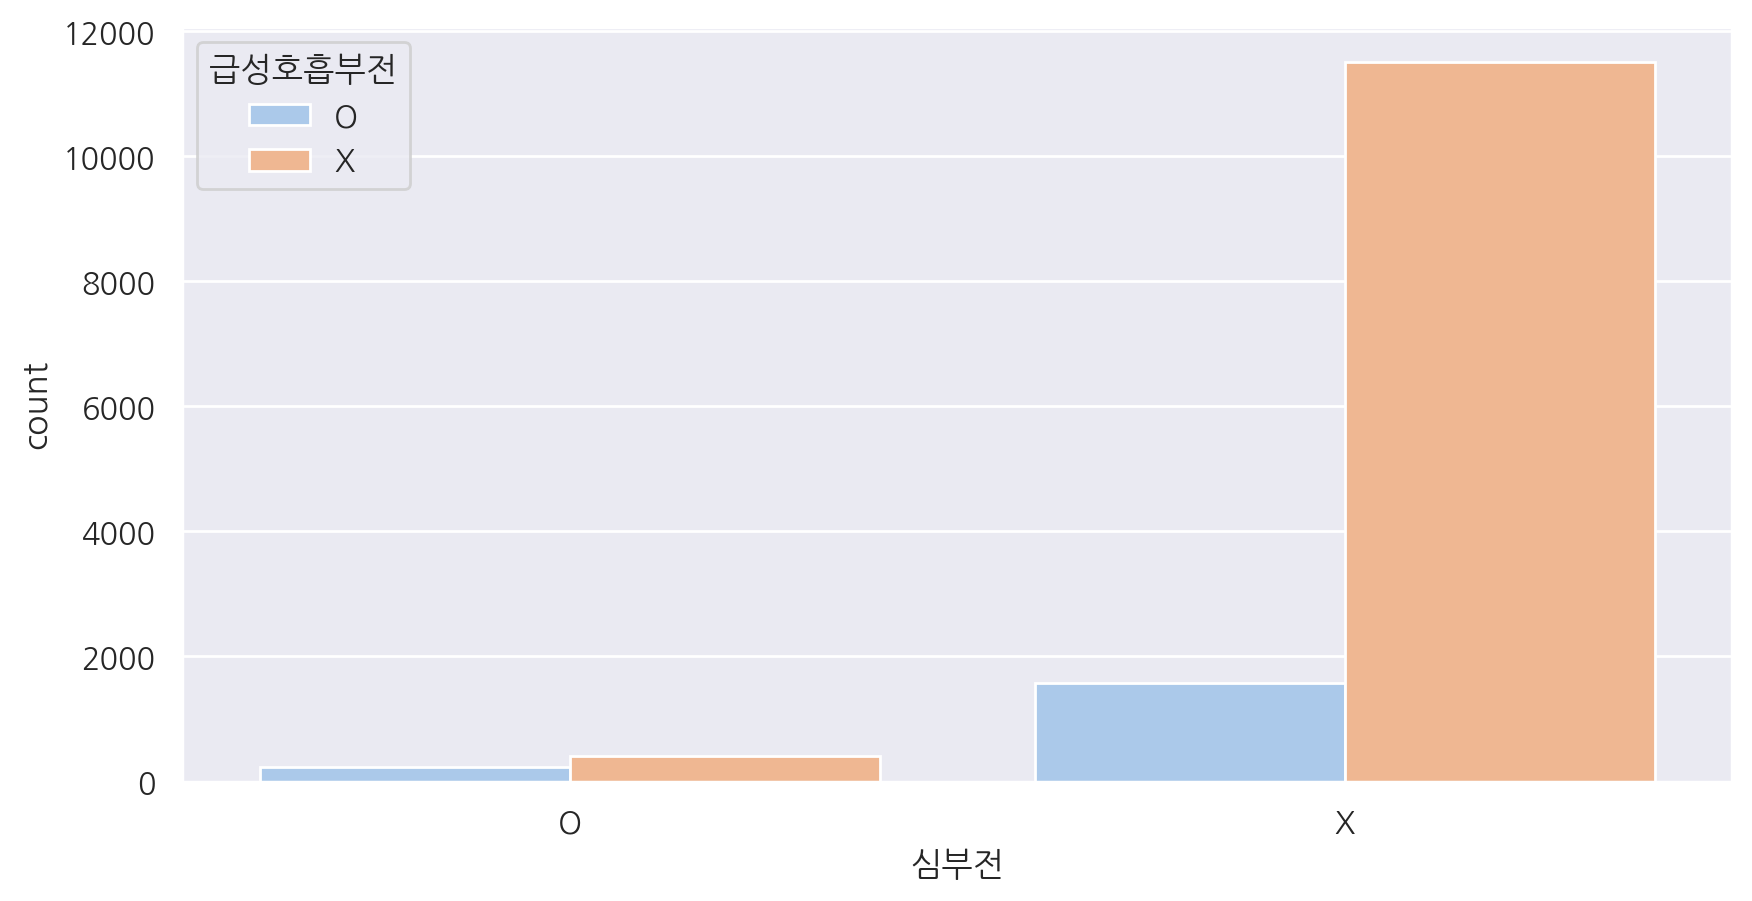

In [94]:
df_with_5849 = pd.DataFrame(FwithS_mat['icd9 : 51881'])
df_with_5849['심부전'] = 'O'
df_out_5849 = pd.DataFrame(FwoutS_mat['icd9 : 51881'])
df_out_5849['심부전'] = 'X'
df_out_5849 = df_out_5849.reset_index()
df_out_5849 = df_out_5849.drop('index', axis=1)

df_5849 = pd.concat([df_with_5849, df_out_5849])
df_5849 = df_5849.rename(columns={'icd9 : 51881': '급성호흡부전'})

fig = plt.figure(figsize=(10, 5), dpi=200)

sns.countplot(data=df_5849, x='심부전', hue='급성호흡부전')
sns.set_palette("pastel")

### 동맥경화

<AxesSubplot:xlabel='심부전', ylabel='count'>

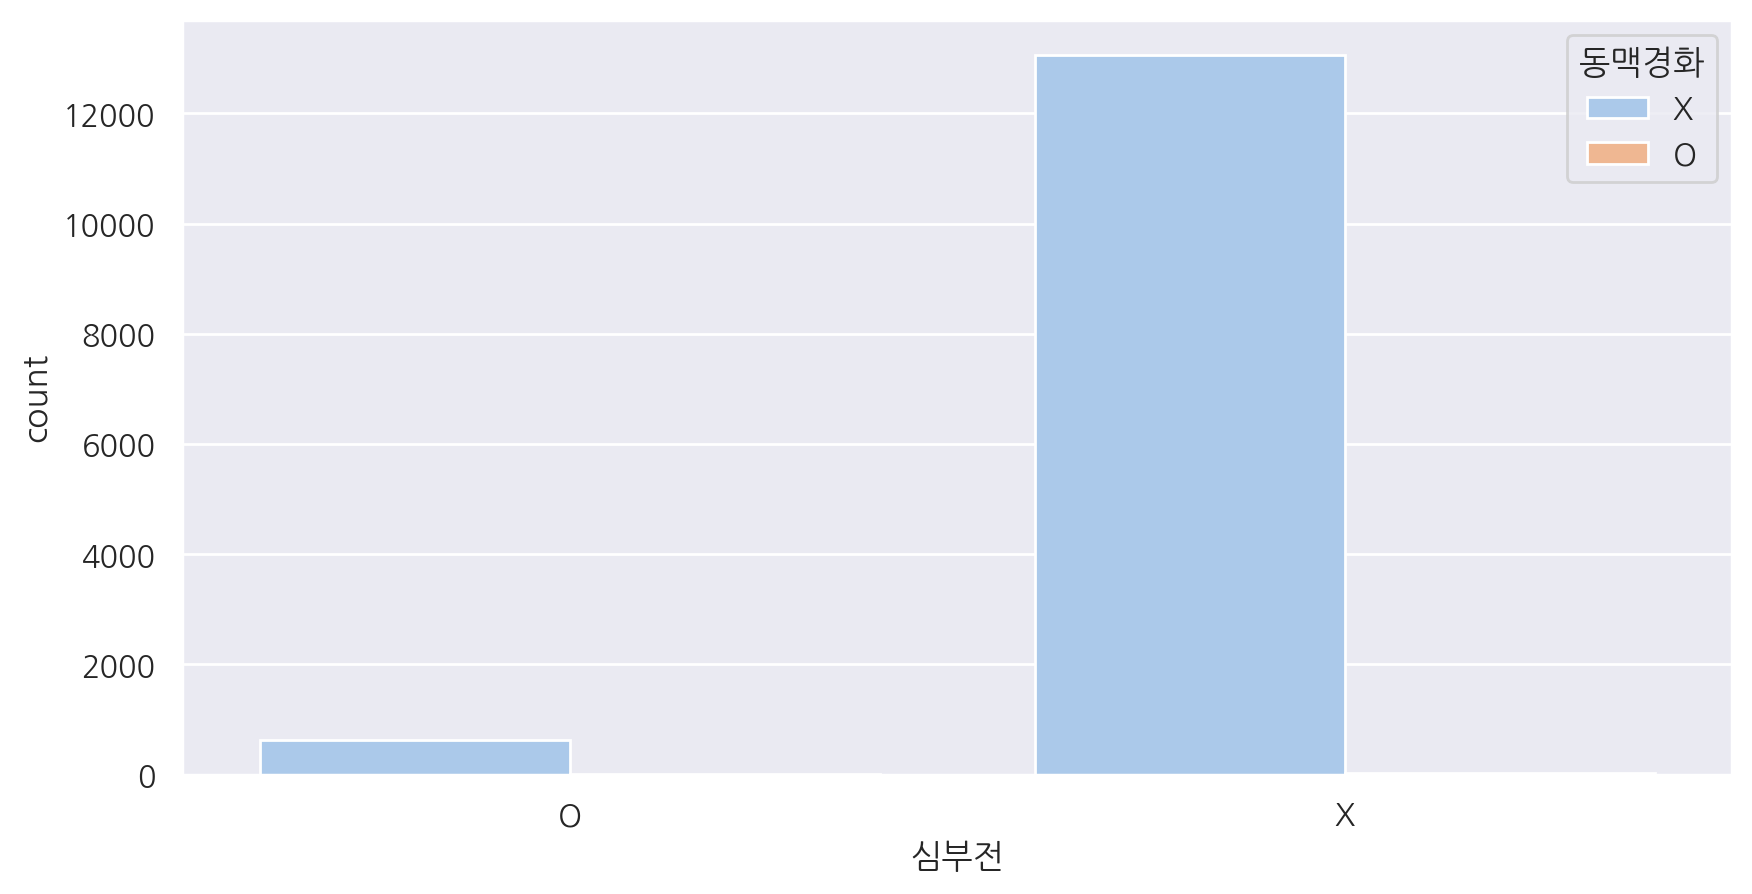

In [95]:
df_with_5849 = pd.DataFrame(FwithS_mat['icd9 : 44022'])
df_with_5849['심부전'] = 'O'
df_out_5849 = pd.DataFrame(FwoutS_mat['icd9 : 44022'])
df_out_5849['심부전'] = 'X'
df_out_5849 = df_out_5849.reset_index()
df_out_5849 = df_out_5849.drop('index', axis=1)

df_5849 = pd.concat([df_with_5849, df_out_5849])
df_5849 = df_5849.rename(columns={'icd9 : 44022': '동맥경화'})

fig = plt.figure(figsize=(10, 5), dpi=200)

sns.countplot(data=df_5849, x='심부전', hue='동맥경화')
sns.set_palette("pastel")

### 빈혈

<AxesSubplot:xlabel='심부전', ylabel='count'>

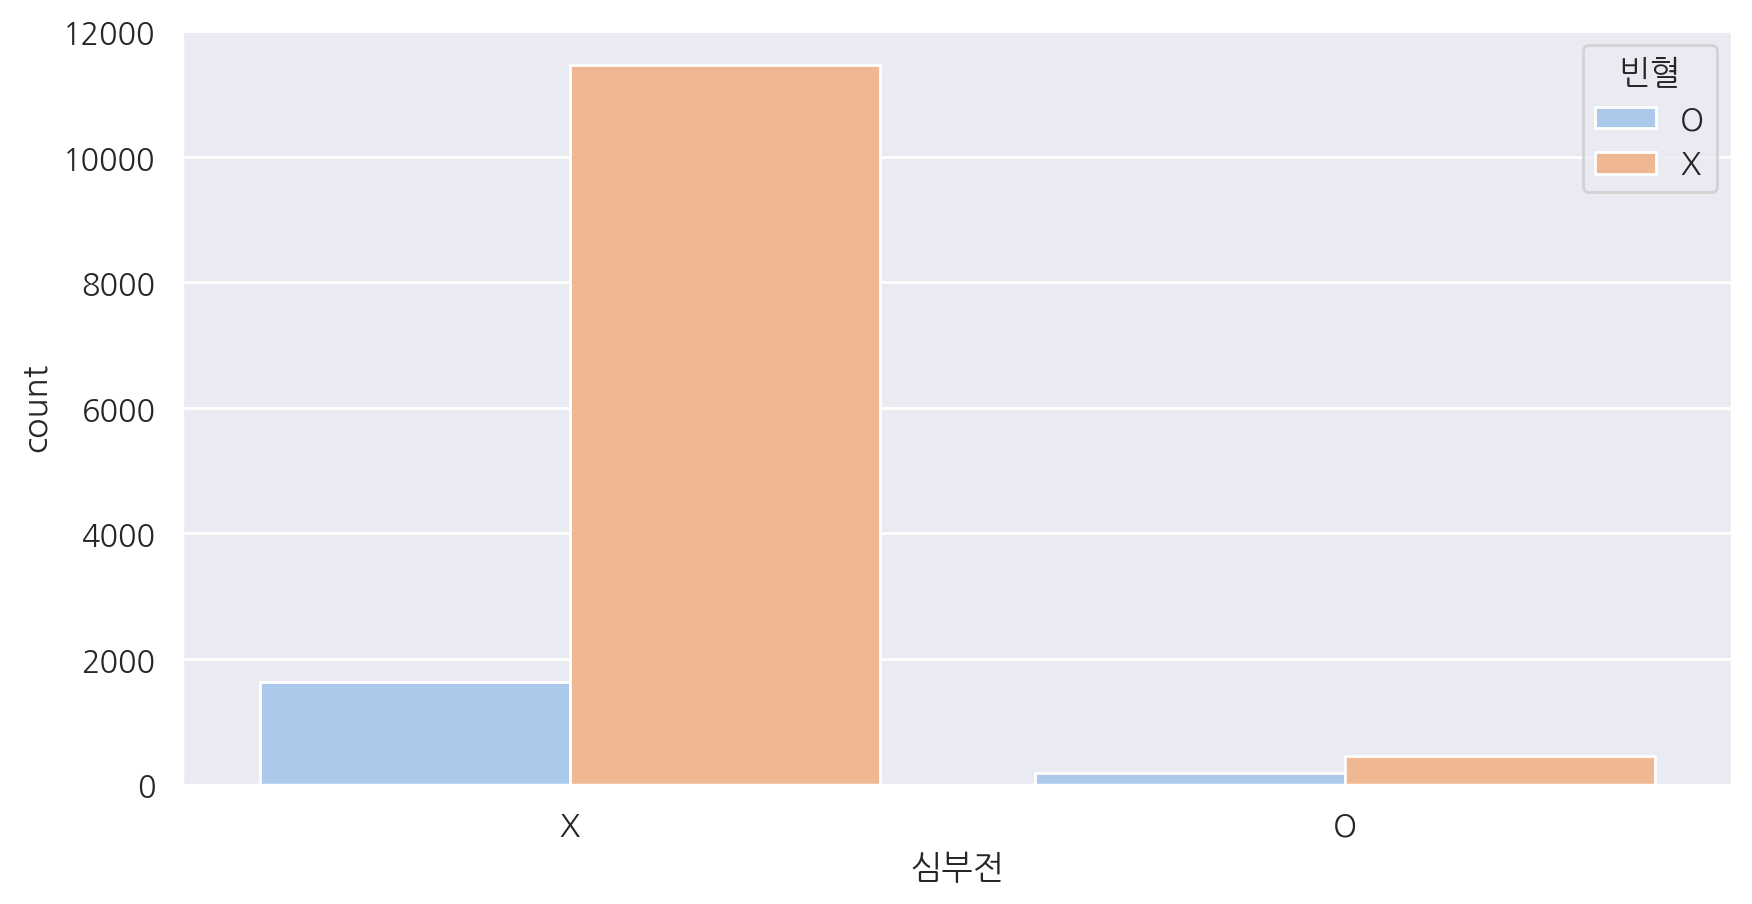

In [96]:
df_with_5849 = pd.DataFrame(FwithS_mat['icd9 : 2859'])
df_with_5849['심부전'] = 'O'
df_out_5849 = pd.DataFrame(FwoutS_mat['icd9 : 2859'])
df_out_5849['심부전'] = 'X'
df_out_5849 = df_out_5849.reset_index()
df_out_5849 = df_out_5849.drop('index', axis=1)

df_5849 = pd.concat([df_with_5849, df_out_5849])
df_5849 = df_5849.rename(columns={'icd9 : 2859': '빈혈'})
df_5849 = df_5849.sort_values(by='빈혈')

fig = plt.figure(figsize=(10, 5), dpi=200)

sns.countplot(data=df_5849, x='심부전', hue='빈혈')
sns.set_palette("pastel")

### 피질 부신 기능 부전

<AxesSubplot:xlabel='심부전', ylabel='count'>

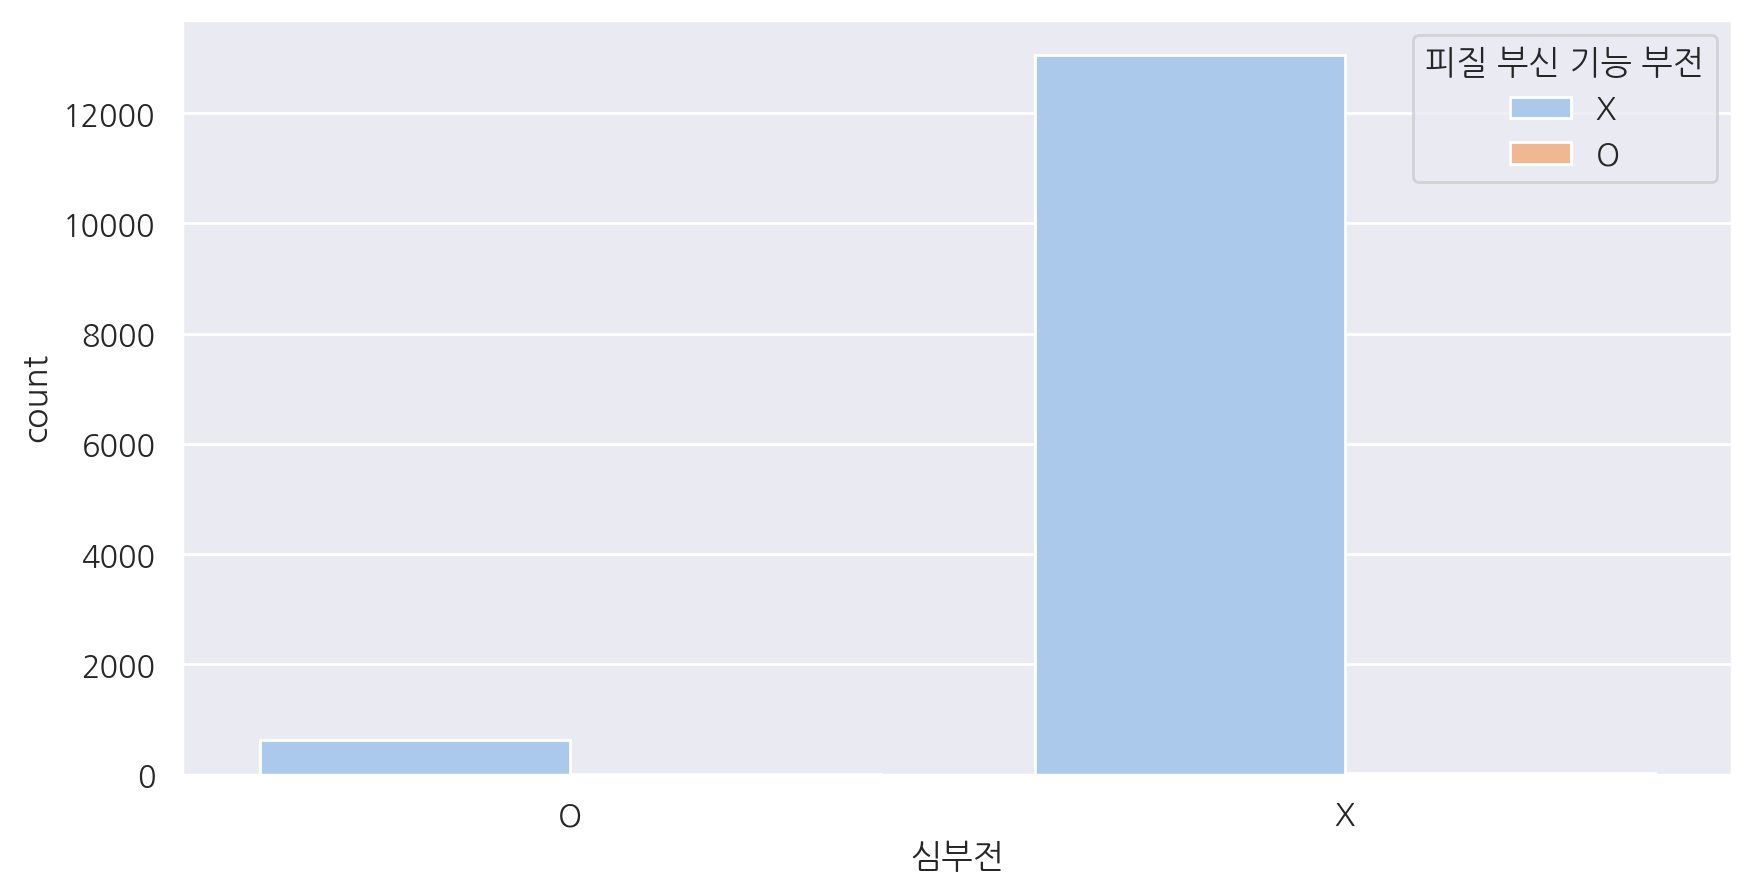

In [97]:
df_with_5849 = pd.DataFrame(FwithS_mat['icd9 : 2554'])
df_with_5849['심부전'] = 'O'
df_out_5849 = pd.DataFrame(FwoutS_mat['icd9 : 2554'])
df_out_5849['심부전'] = 'X'
df_out_5849 = df_out_5849.reset_index()
df_out_5849 = df_out_5849.drop('index', axis=1)

df_5849 = pd.concat([df_with_5849, df_out_5849])
df_5849 = df_5849.rename(columns={'icd9 : 2554': '피질 부신 기능 부전'})

fig = plt.figure(figsize=(10, 5), dpi=200)

sns.countplot(data=df_5849, x='심부전', hue='피질 부신 기능 부전')
sns.set_palette("pastel")